In [25]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from textblob import TextBlob 
import string
pd.set_option('max_columns', 100)
pd.options.display.max_colwidth = 5000

import datetime
import plotly.graph_objs as go
from plotly import tools, subplots
import plotly.offline as py

from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist


In [2]:
cab = pd.read_csv('C:/Users/divya/Downloads/cab_tweets10000.csv')
cab.shape

(10000, 7)

In [3]:
cab[cab['text'].duplicated(keep=False)].sort_values('text').head(5)

,created_at,text,retweet_count,favorite_count,user,location,coordinates
7716,2019-12-11 16:03:36,#CitizenshipAmmendmentBill2019 passed in RS. Oppn is set to move SC,0,0,DhGurjar,"Jaipur,Pune,Glasgow",NaN
9540,2019-12-11 15:21:55,#CitizenshipAmmendmentBill2019 passed in RS. Oppn is set to move SC,5,7,AmanKayamHai_ET,Delhi. Heart in Chandigarh,NaN
9941,2019-12-11 15:17:19,#CitizenshipAmmendmentBill2019 passed in Rajya Sabha with 117 votes against it 92.,493,2460,ippatel,"फतेहपुर,उत्तर प्रदेश,भारत",NaN
9875,2019-12-11 15:18:12,#CitizenshipAmmendmentBill2019 passed in Rajya Sabha with 117 votes against it 92.,0,0,MalviYug,"Jaipur, India",NaN
9701,2019-12-11 15:20:09,#CitizenshipAmmendmentBill2019 passed in Rajya Sabha with 117 votes against it 92.,1,4,hemantbhavya,"Delhi, India",NaN


In [4]:
#drop duplicates
cab = cab.drop_duplicates('text')
cab.shape

(9948, 7)

# DATA CLEANING

In [5]:
#change to lower case
cab['text']  = cab['text'].str.lower()

In [6]:
#function to clean tweet text by removing links, special characters using simple regex statements
def replace_apos(tweet): 
        return ' '.join(re.sub("(’)", "'", tweet).split()) 
    
cab['text']  = cab['text'].apply(lambda x: replace_apos(x))    

In [7]:
#expand contractions
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

#expand_contractions("Y'all can't expand contractions I'd think")
cab['text']  = cab['text'].apply(lambda text: expand_contractions(text))

In [9]:
#remove accented chars
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

cab['text']  = cab['text'].apply(lambda x: remove_accented_chars(x))    

In [10]:
#remove links, special characters 
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[_A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)|(\d+)|(\&amp)|(\#[A-Za-z0-9]+)", " ", tweet).split()) 
    
cab['text'] = cab['text'].apply(lambda x: clean_tweet(x))    

In [11]:
#remove punctuations
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

cab['text'] = cab['text'].apply(lambda text: remove_punctuation(text))

In [12]:
#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
cab['text'] = cab['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
#get tweet sentiment
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet)
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

cab['sentiment'] = cab['text'].apply(lambda x: get_tweet_sentiment(x))
cab['sentiment'].value_counts()        

neutral     6164
positive    2526
negative    1258
Name: sentiment, dtype: int64

In [14]:
#Stemming and Lemmatization
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# Passing the function to 'text_rare' and store in 'text_lemma'
cab['text'] = cab['text'].apply(lemmatize_words)

In [15]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return " ".join([stemmer.stem(word) for word in tokenizer.tokenize(text.lower())])

cab['text'] = cab['text'].apply(tokenize)

In [16]:
cab.head()

,created_at,text,retweet_count,favorite_count,user,location,coordinates,sentiment
0,2019-12-13 03:32:22,feel damag imag offic resign post behavior shame,0,0,Naushad21966212,"Kota, India",NaN,neutral
1,2019-12-13 03:29:01,youth kill get dark today guwahati due polic,0,0,Guru81717846,NaN,NaN,negative
2,2019-12-13 03:27:14,youth kill get dark today guwahati due polic fire bill,0,1,Guru81717846,NaN,NaN,negative
3,2019-12-13 03:26:08,petit file iuml claim violat articl con,3,3,kashmira_07,"Mumbai, India",NaN,neutral
4,2019-12-13 03:25:10,look like drill shame u spread fake ne,0,0,prb_20,"Pune, India",NaN,negative


In [17]:
#common word removal
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in cab["text"].values:
    for word in text.split():
        cnt[word] += 1

#Now, we can remove the frequent words in the given corpus. This can be taken care automatically if we use tf-idf
# Removing the frequent words
freq = set([w for (w, wc) in cnt.most_common(20)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
# Passing the function freqwords
cab["text"] = cab["text"].apply(freqwords)        

In [18]:
#rare word removal
# Removal of 10 rare words and store into new column called 'text_rare'
freq = pd.Series(' '.join(cab['text']).split()).value_counts()[-20:] # 10 rare words
freq = list(freq.index)

#removal of rare word
cab['text'] = cab['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [19]:
rm_words_list = ['u','go','like','say','even','bjp','cabbill','country']

def remove_words(tweet):
    rm_words = ' '.join([c for c in tweet.split() if c not in rm_words_list])
    return rm_words

cab['text'] = cab['text'].apply(lambda x: remove_words(x))

# WORD CLOUD

In [20]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                                and word !='india'
                                and word !='indian'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=250,
                      height=200
                     ).generate(cleaned_word)
    
    return wordcloud

In [21]:
cab_pos = cab[cab['sentiment'] == 'positive']
cab_pos = cab_pos['text']

cab_neg = cab[cab['sentiment'] == 'negative']
cab_neg = cab_neg['text']

(-0.5, 249.5, 199.5, -0.5)

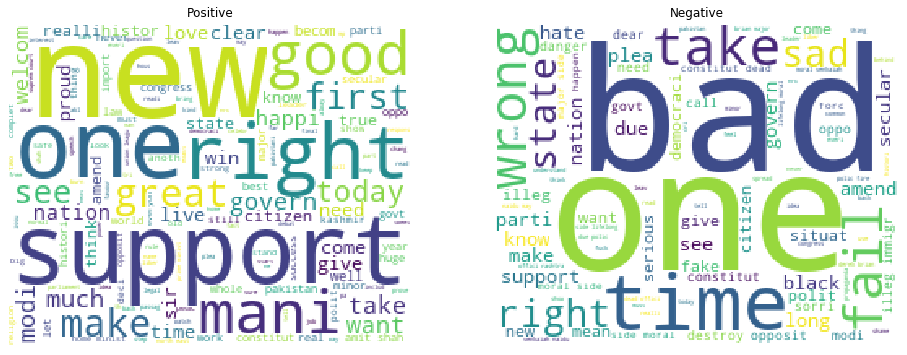

In [22]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
wp = wordcloud_draw(cab_pos,'white')
plt.imshow(wp)
plt.title('Positive')
plt.axis("off")

plt.subplot(1, 2, 2)
wn = wordcloud_draw(cab_neg,'white')
plt.imshow(wn)
plt.title('Negative')
plt.axis("off")

(-0.5, 899.5, 899.5, -0.5)

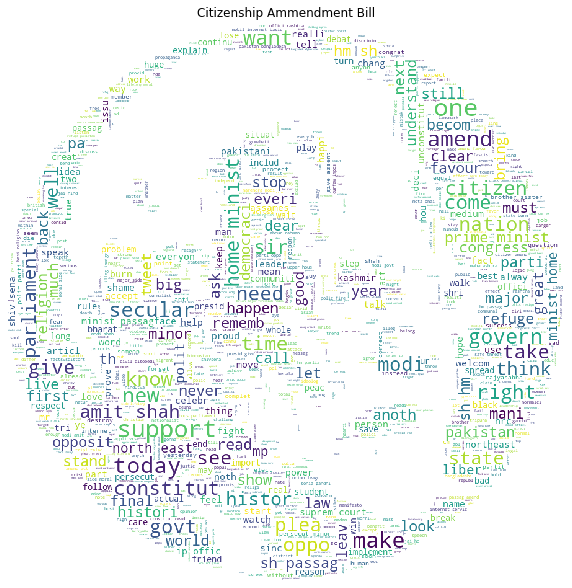

In [24]:
#Colored images
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(review for review in cab.text)

# read the mask / color image taken from
modi_coloring = np.array(Image.open(path.join(d, "modi4.jpg")))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=3000, mask=modi_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(modi_coloring)

# show only wc over masked image
plt.figure(figsize = (10,30))
plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc)
plt.title('Citizenship Ammendment Bill')
plt.axis("off")

# show
